In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os, gc
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 200)
pd.set_option('display.max.columns', 200)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', 
        font_scale=2, color_codes=True, rc=None)

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [4]:
df.drop(['Unnamed: 0', 'team_name','team_id', 'shot_id_number'], axis=1, inplace=True)
df.shape

(30697, 24)

In [5]:
df.apply(lambda x: x.value_counts().shape[0])

match_event_id            618
location_x                488
location_y                450
remaining_min              12
power_of_shot               7
knockout_match              2
game_season                20
remaining_sec              60
distance_of_shot           73
is_goal                     2
area_of_shot                6
shot_basics                 7
range_of_shot               5
date_of_game             1558
home/away                  74
lat/lng                    38
type_of_shot               57
type_of_combined_shot       6
match_id                 1559
remaining_min.1           291
power_of_shot.1           206
knockout_match.1          382
remaining_sec.1           354
distance_of_shot.1        271
dtype: int64

In [18]:
for col in df.columns:
    print(col.ljust(25), df[col].unique().shape[0], " ".ljust(10), df[col].dtype)

match_event_id            619            float64
location_x                489            float64
location_y                451            float64
remaining_min             13            float64
power_of_shot             8            float64
knockout_match            3            float64
game_season               21            object
remaining_sec             61            float64
distance_of_shot          74            float64
is_goal                   3            float64
area_of_shot              7            object
shot_basics               8            object
range_of_shot             6            object
date_of_game              1559            object
home/away                 75            object
lat/lng                   39            object
type_of_shot              58            object
type_of_combined_shot     7            object
match_id                  1559            int64
remaining_min.1           292            float64
power_of_shot.1           207            float64
k

In [29]:
float_col = df.columns[df.dtypes == np.float64]
object_col = df.columns[df.dtypes == 'object']

float_col = list(float_col)
object_col = list(object_col)
float_col.remove('is_goal')

len(float_col), len(object_col)

In [203]:
df['dg'] = df['date_of_game'].astype('str')
df['dg'] = df['dg'].apply(lambda x: x.replace('nan', '2016-05-01'))

print(df.shape, "==>", end=" ")
df['year'] = df['dg'].apply(lambda x: x.split('-')[0])
df['month'] = df['dg'].apply(lambda x: x.split('-')[1])
df['date'] = df['dg'].apply(lambda x: x.split('-')[2])
print(df.shape)

(30697, 25) ==> (30697, 28)


In [198]:
# df[df['dg'] == 'nan']['dg']
df['dg'] = df['dg'].apply(lambda x: x.replace('nan', '2016-05-01'))
df['dg'].value_counts().sort_index()

1996-11-03       1
1996-11-06       3
1996-11-08       8
1996-11-10       3
1996-11-12       2
1996-11-13       2
1996-11-15       4
1996-11-17       8
1996-11-19       2
1996-11-20       5
1996-11-26       9
1996-11-27       6
1996-11-29       1
1996-12-01       2
1996-12-04       6
1996-12-08       8
1996-12-10       1
1996-12-17       5
1996-12-21       2
1996-12-25       2
1996-12-29       1
1997-01-02       3
1997-01-03       9
1997-01-05       7
1997-01-06       9
1997-01-08      12
1997-01-10       2
1997-01-14       6
1997-01-18      13
1997-01-20       6
1997-01-24       6
1997-01-26       6
1997-01-28       9
1997-01-29      11
1997-02-02       9
1997-02-04      10
1997-02-05       7
1997-02-12       3
1997-02-13      10
1997-02-16       3
1997-02-19       4
1997-02-21       1
1997-02-23       1
1997-02-28       1
1997-03-02       9
1997-03-04       2
1997-03-07      10
1997-03-09       5
1997-03-12      10
1997-03-14      13
1997-03-16       8
1997-03-17       7
1997-03-20  

In [210]:
df.drop(['game_season','dg', 'date', 'date_of_game'], axis=1, inplace=True)
df.shape

(30697, 24)

In [223]:
object_col = df.columns[df.dtypes == 'object']
object_col = list(object_col)

# df.columns[df.dtypes == 'object']

for col in object_col:
    print(col.ljust(25), df[col].unique().shape[0])

area_of_shot              7
shot_basics               8
range_of_shot             6
home/away                 39
lat/lng                   39
type_of_shot              58
type_of_combined_shot     7
year                      21
month                     9


In [216]:
df['home/away'].value_counts()

MANU @ SAS      971
MANU vs. SAS    890
MANU @ SAC      845
MANU @ DEN      832
MANU vs. HOU    828
MANU @ PHX      825
MANU vs. PHX    805
MANU @ HOU      756
MANU @ POR      755
MANU vs. DEN    729
MANU vs. POR    718
MANU vs. SAC    718
MANU @ MIN      710
MANU vs. UTA    704
MANU @ UTA      694
MANU vs. MIN    693
MANU @ GSW      655
MANU vs. GSW    642
MANU vs. LAC    620
MANU @ LAC      593
MANU @ DAL      578
MANU vs. DAL    542
MANU @ BOS      497
MANU @ MEM      490
MANU vs. MEM    486
MANU @ SEA      410
MANU vs. BOS    404
MANU @ ORL      399
MANU vs. IND    394
MANU vs. SEA    383
MANU @ PHI      374
MANU @ DET      355
MANU vs. OKC    349
MANU @ IND      333
MANU vs. DET    328
MANU @ TOR      322
MANU @ NYK      315
MANU vs. MIA    315
MANU vs. PHI    311
MANU @ WAS      310
MANU vs. NYK    309
MANU @ CLE      306
MANU vs. TOR    305
MANU @ OKC      302
MANU vs. ORL    293
MANU @ CHI      292
MANU vs. CHI    291
MANU @ ATL      288
MANU vs. MIL    288
MANU @ MIA      284


In [217]:
df['home/away1'] = df['home/away'].copy()
df['home/away'] = df['home/away'].astype('str')
df['home/away'] = df['home/away'].apply(lambda x: x.replace('nan', 'NEW'))

print(df.shape, "==>", end=" ")
df['home/away'] = df['home/away'].apply(lambda x: x[-3:])
print(df.shape)

(30697, 25) ==> (30697, 25)


In [222]:
df.drop(['home/away1'], axis=1, inplace=True)

In [224]:
df[float_col].isnull().sum()

match_event_id        1563
location_x            1461
location_y            1540
remaining_min         1562
power_of_shot         1486
knockout_match        1517
remaining_sec         1594
distance_of_shot      1567
remaining_min.1       1535
power_of_shot.1       1539
knockout_match.1      1493
remaining_sec.1       1539
distance_of_shot.1    1568
dtype: int64

In [43]:
df[df.isnull().any(axis=1)]

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,lat/lng,type_of_shot,type_of_combined_shot,match_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 30,NaN,20000012,10.0000,1.00,50.608,54.2000,38.000
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 45,NaN,20000012,10.0000,1.00,28.800,22.0000,35.000
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,2000-10-31,NaN,"45.539131, -122.651648",shot - 25,NaN,20000012,92.6400,1.00,0.000,63.7216,54.400
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",NaN,shot - 3,20000012,NaN,1.00,122.608,52.0000,42.000
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",NaN,shot - 1,20000012,42.6400,2.00,0.000,19.0000,20.000
5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 17,NaN,20000012,9.0000,3.00,0.000,NaN,34.000
6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",NaN,shot - 4,20000012,8.0000,3.00,0.000,112.2000,89.400
7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",NaN,shot - 3,20000012,68.6400,3.00,0.000,5.0000,22.000
8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,Left Side(L),Goal Line,8-16 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 36,NaN,20000012,6.0000,3.00,0.000,12.0000,32.000
9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,Center(C),Goal Line,8-16 ft.,2000-10-31,MANU @ POR,"45.539131, -122.651648",shot - 44,NaN,20000012,3.0000,3.00,0.000,52.2000,NaN


In [44]:
df['game_season'].unique()

array(['2000-01', nan, '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '1996-97',
       '1997-98', '1998-99', '1999-00'], dtype=object)

In [49]:
df['game_season'].value_counts().sort_index()

1996-97     381
1997-98     804
1998-99     752
1999-00    1264
2000-01    1488
2001-02    1632
2002-03    1823
2003-04    1329
2004-05    1074
2005-06    1911
2006-07    1537
2007-08    1733
2008-09    1810
2009-10    1665
2010-11    1462
2011-12    1326
2012-13    1296
2013-14      61
2014-15     594
2015-16     893
Name: game_season, dtype: int64

In [48]:
df['game_season'].isnull().sum()

5862

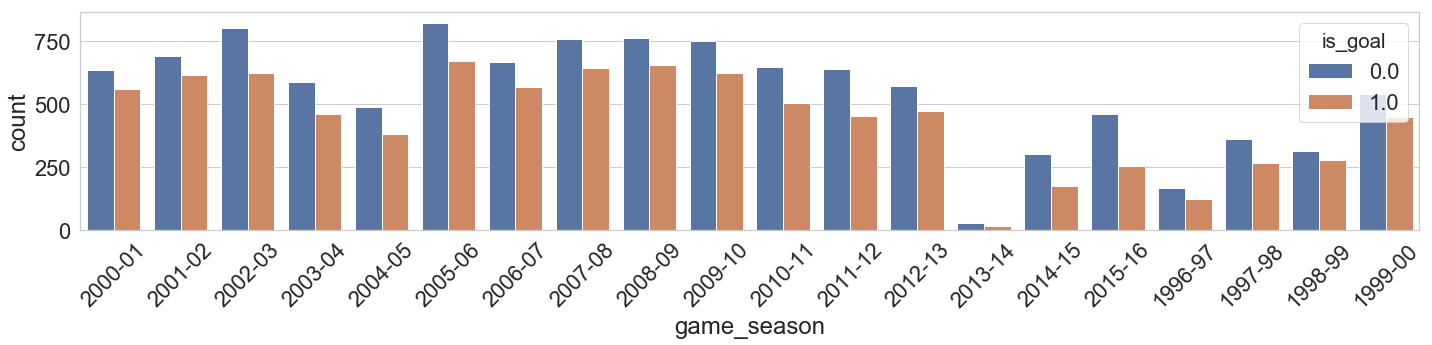

In [58]:
fig, ax = plt.subplots(figsize=(24, 4))

g = sns.countplot(x='game_season', hue='is_goal', data=df, ax=ax)
for item in g.get_xticklabels():
    item.set_rotation(45)

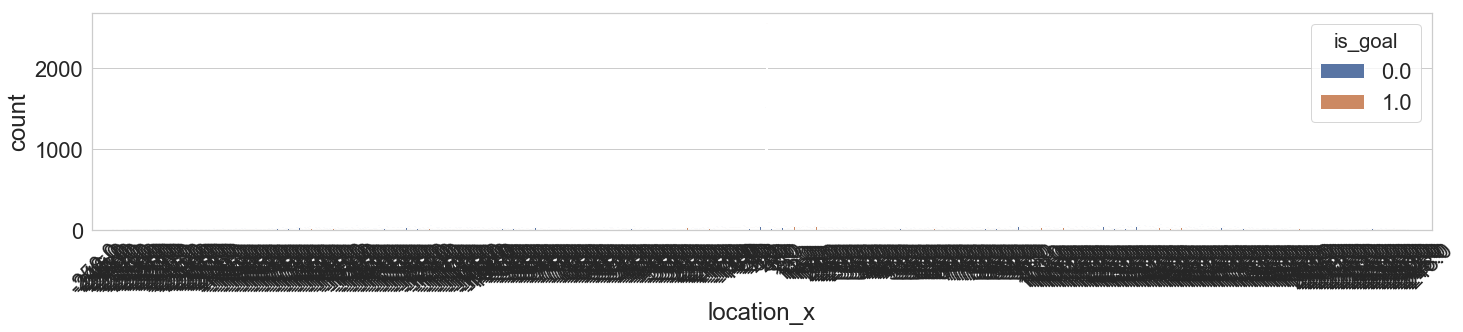

In [59]:
fig, ax = plt.subplots(figsize=(24, 4))

g = sns.countplot(x='location_x', hue='is_goal', data=df, ax=ax)
for item in g.get_xticklabels():
    item.set_rotation(45)

In [ ]:
fig, ax = plt.subplots(figsize=(24, 4))

g = sns.countplot(x='location_y', hue='is_goal', data=df, ax=ax)
for item in g.get_xticklabels():
    item.set_rotation(45)

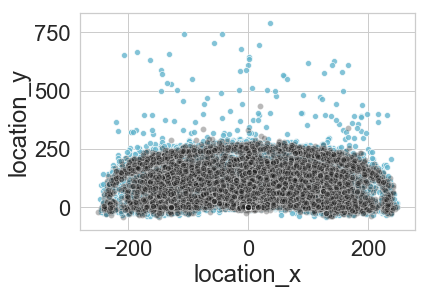

In [80]:
sns.scatterplot(df[df.is_goal == 0].location_x, df[df.is_goal == 0].location_y, alpha=0.8, color='c')
sns.scatterplot(df[df.is_goal == 1].location_x, df[df.is_goal == 1].location_y, alpha=0.3, color='k')

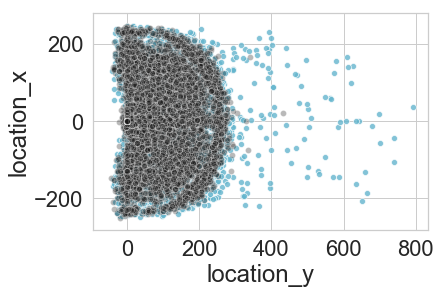

In [81]:
sns.scatterplot(df[df.is_goal == 0].location_y, df[df.is_goal == 0].location_x, alpha=0.8, color='c')
sns.scatterplot(df[df.is_goal == 1].location_y, df[df.is_goal == 1].location_x, alpha=0.3, color='k')

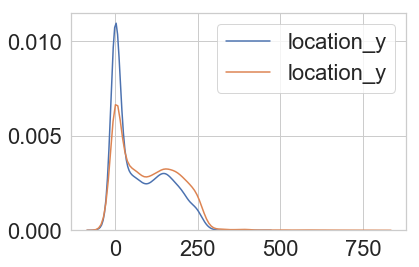

In [89]:
sns.kdeplot(df[df.is_goal == 1].location_y)
sns.kdeplot(df[df.is_goal == 0].location_y)

In [93]:
df[df.is_goal == 1].location_y.value_counts()

 0.0      2586
 7.0        94
 12.0       80
 3.0        78
 17.0       74
 1.0        73
 4.0        70
 26.0       70
 23.0       67
 61.0       67
 156.0      64
 11.0       64
 173.0      64
 9.0        62
 160.0      61
 22.0       60
-3.0        59
 33.0       59
 15.0       58
 6.0        57
 184.0      53
 25.0       53
 20.0       53
 135.0      52
 63.0       52
 194.0      52
 179.0      51
 148.0      51
 91.0       50
 31.0       50
 36.0       50
 110.0      48
 146.0      48
 82.0       48
 28.0       47
-1.0        47
 10.0       47
 137.0      47
 53.0       46
 138.0      46
 115.0      45
 30.0       45
 56.0       45
 48.0       45
 104.0      44
 45.0       43
 127.0      43
 2.0        43
-6.0        43
 19.0       43
-5.0        43
 34.0       43
 186.0      42
 41.0       42
 158.0      42
 143.0      42
 71.0       42
 145.0      42
 154.0      41
-2.0        41
 181.0      41
 66.0       41
 140.0      41
 153.0      41
 151.0      40
 99.0       40
 58.0     

In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, verbose=1, random_state=1337, n_jobs=4)
kmeans.fit(df[['location_x','location_y']].dropna())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=1337, tol=0.0001, verbose=1)

In [98]:
kmeans.cluster_centers_

array([[ -16.43797856,  221.67126085],
       [  -0.76857804,    8.47557213],
       [ 109.88977956,  208.59318637],
       [ 156.30551676,   19.29364525],
       [-158.02549102,   29.17634768],
       [ -89.28293737,  113.45442765],
       [-155.6732866 ,  185.6732866 ],
       [ 154.78600978,  135.01241068],
       [  38.27010849,   92.97418631],
       [ -10.67142857,  529.37142857]])

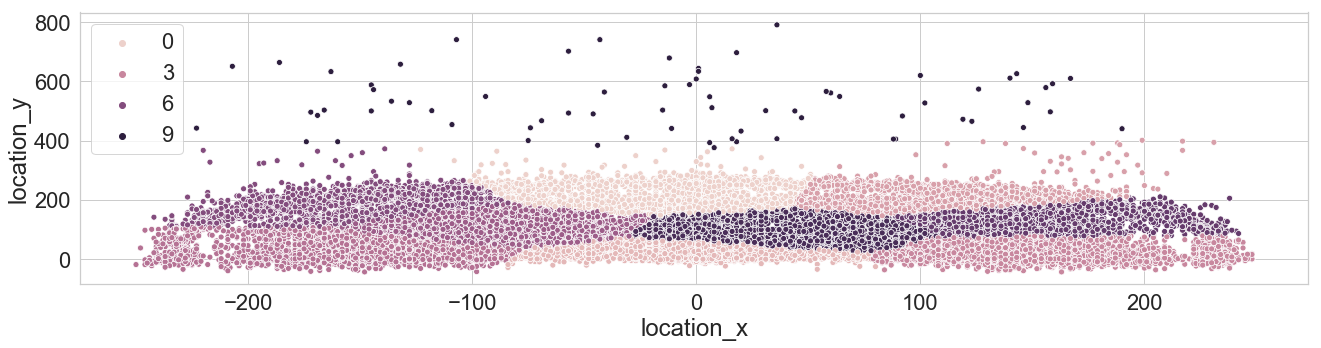

In [102]:
fig, ax = plt.subplots(figsize=(22, 5))
sns.scatterplot(x='location_x', y='location_y', data=df[['location_x','location_y']].dropna(), hue=kmeans.labels_, ax=ax)

In [154]:
df[df.location_y >= 400].is_goal.dropna().value_counts()

0.0    62
1.0     1
Name: is_goal, dtype: int64

In [141]:
def get_quantile(df, col, q1, q2):
    """compute quantile range
    args:
        col: col name
        q1: lower quantile percentile
        q2: upper quantile percentile
    """
    df1 = df[[col]].dropna()
    lower_bound = np.percentile(df1, q=q1)
    upper_bound = np.percentile(df1, q=q2)
    lower_bound = np.round(lower_bound,3)
    upper_bound = np.round(upper_bound, 3)
    min_ = np.round(np.min(df1[col]), 3)
    max_ = np.round(np.max(df1[col]), 3)
    print("{4:<25} min: {0:<10} max: {1:<10} low: {2:<10} high: {3:<10}".format(min_, max_, lower_bound, upper_bound, col))


for col in float_col:
    try:
        get_quantile(df[df.is_goal == 0], col, 1, 99)
    except:
        print("couldn't do it")
        
print("=="*45)        

for col in float_col:
    try:
        get_quantile(df[df.is_goal == 1], col, 1, 99)
    except:
        print("couldn't do it")

match_event_id            min: 2.0        max: 653.0      low: 4.58       high: 544.0     
location_x                min: -248.0     max: 248.0      low: -226.03    high: 230.0     
location_y                min: -42.0      max: 791.0      low: -19.0      high: 291.0     
remaining_min             min: 0.0        max: 11.0       low: 0.0        high: 11.0      
power_of_shot             min: 1.0        max: 7.0        low: 1.0        high: 5.0       
knockout_match            min: 0.0        max: 1.0        low: 0.0        high: 1.0       
remaining_sec             min: 0.0        max: 59.0       low: 0.0        high: 59.0      
distance_of_shot          min: 20.0       max: 99.0       low: 20.0       high: 51.0      
remaining_min.1           min: 0.0        max: 128.762    low: 0.0        high: 114.64    
power_of_shot.1           min: 1.0        max: 118.36     low: 1.0        high: 113.36    
knockout_match.1          min: 0.0        max: 141.352    low: 0.0        high: 129.928   

In [130]:
print("{0:<20} {1}".format(1, 34))

1                    34


In [110]:
df.match_id.value_counts()

21501228    50
20200069    47
20500591    46
20600431    45
20700553    44
20601081    44
21200398    41
20500480    41
20200743    41
20200127    40
20600977    39
20500988    39
20501078    38
40200221    38
20800884    38
20600340    38
20200769    38
20601016    37
20701082    37
20900527    37
20500412    37
21400056    37
20200142    37
20500192    36
20500114    36
20000267    35
40500156    35
20200223    35
40000069    35
20500563    35
20600994    35
20500130    35
20200372    35
20000884    34
20500145    34
40800401    34
21400145    34
20601118    34
20100525    34
20200806    34
20500203    33
20500981    33
20800782    33
21000249    33
20601044    33
20000896    33
20400126    33
20500573    33
40600151    33
20700988    33
40600155    33
20601174    33
20900426    33
20500903    33
21200960    33
20501130    33
20500297    33
40700224    33
41100235    33
20500888    32
20200790    32
20501089    32
20501120    32
20200471    32
20700002    32
21200601    32
41100165  

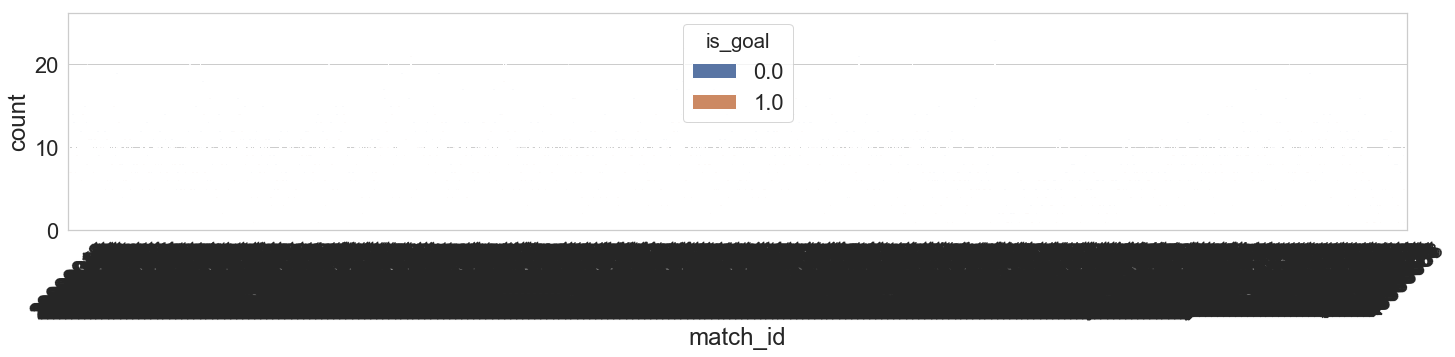

In [111]:
fig, ax = plt.subplots(figsize=(24, 4))

g = sns.countplot(x='match_id', hue='is_goal', data=df, ax=ax)
for item in g.get_xticklabels():
    item.set_rotation(45)

# SCORE: 1 / (1 + MAE)     .......  ##MAE: mean absolute error

## There seem to be duplicate columns, but turns out that these are uncorrelated component, which i guess, represent the first and second lap data, which make sense.

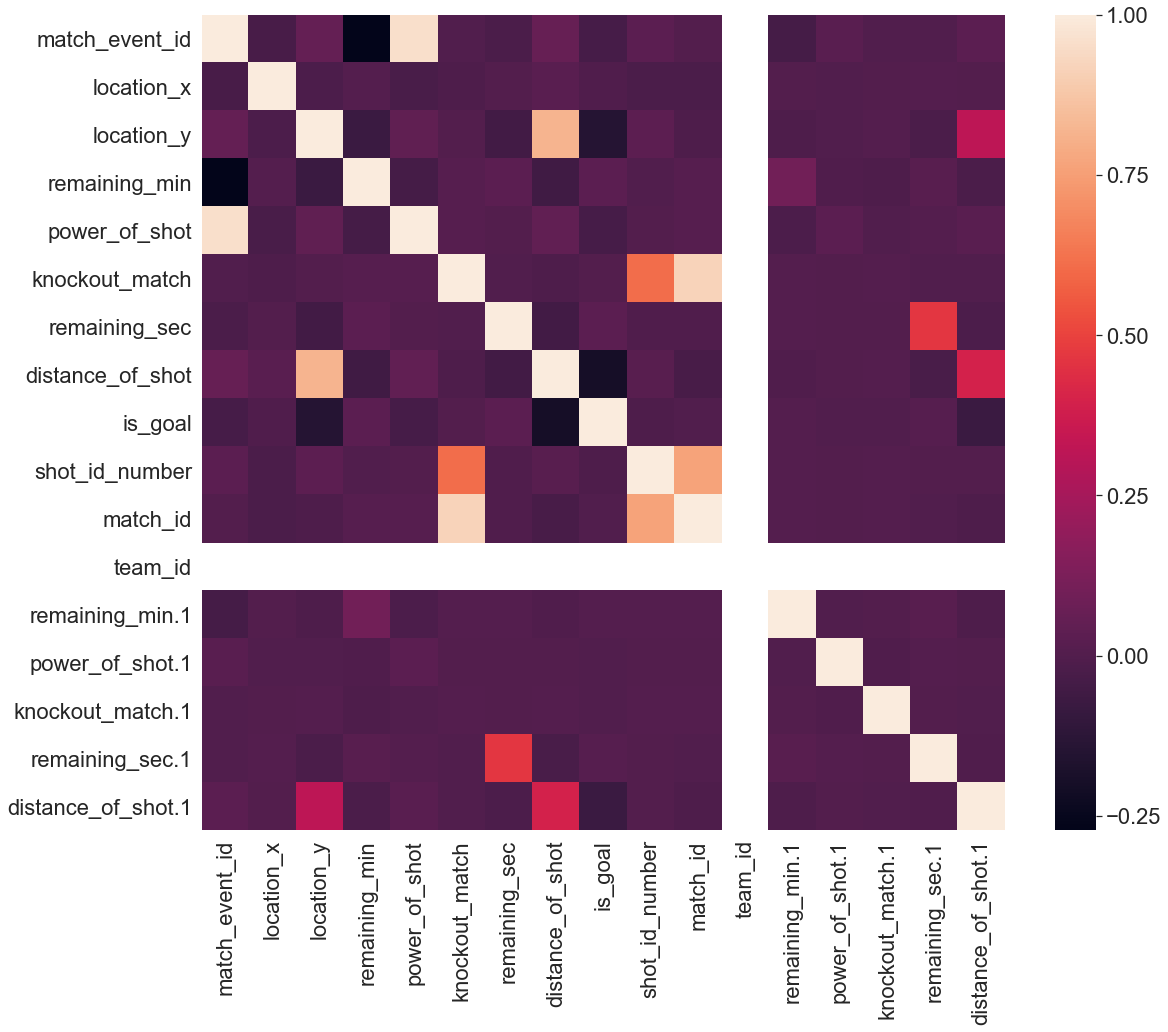

In [28]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

In [225]:
len(object_col)

9

0 1 2 3 4 5 6 7 8 

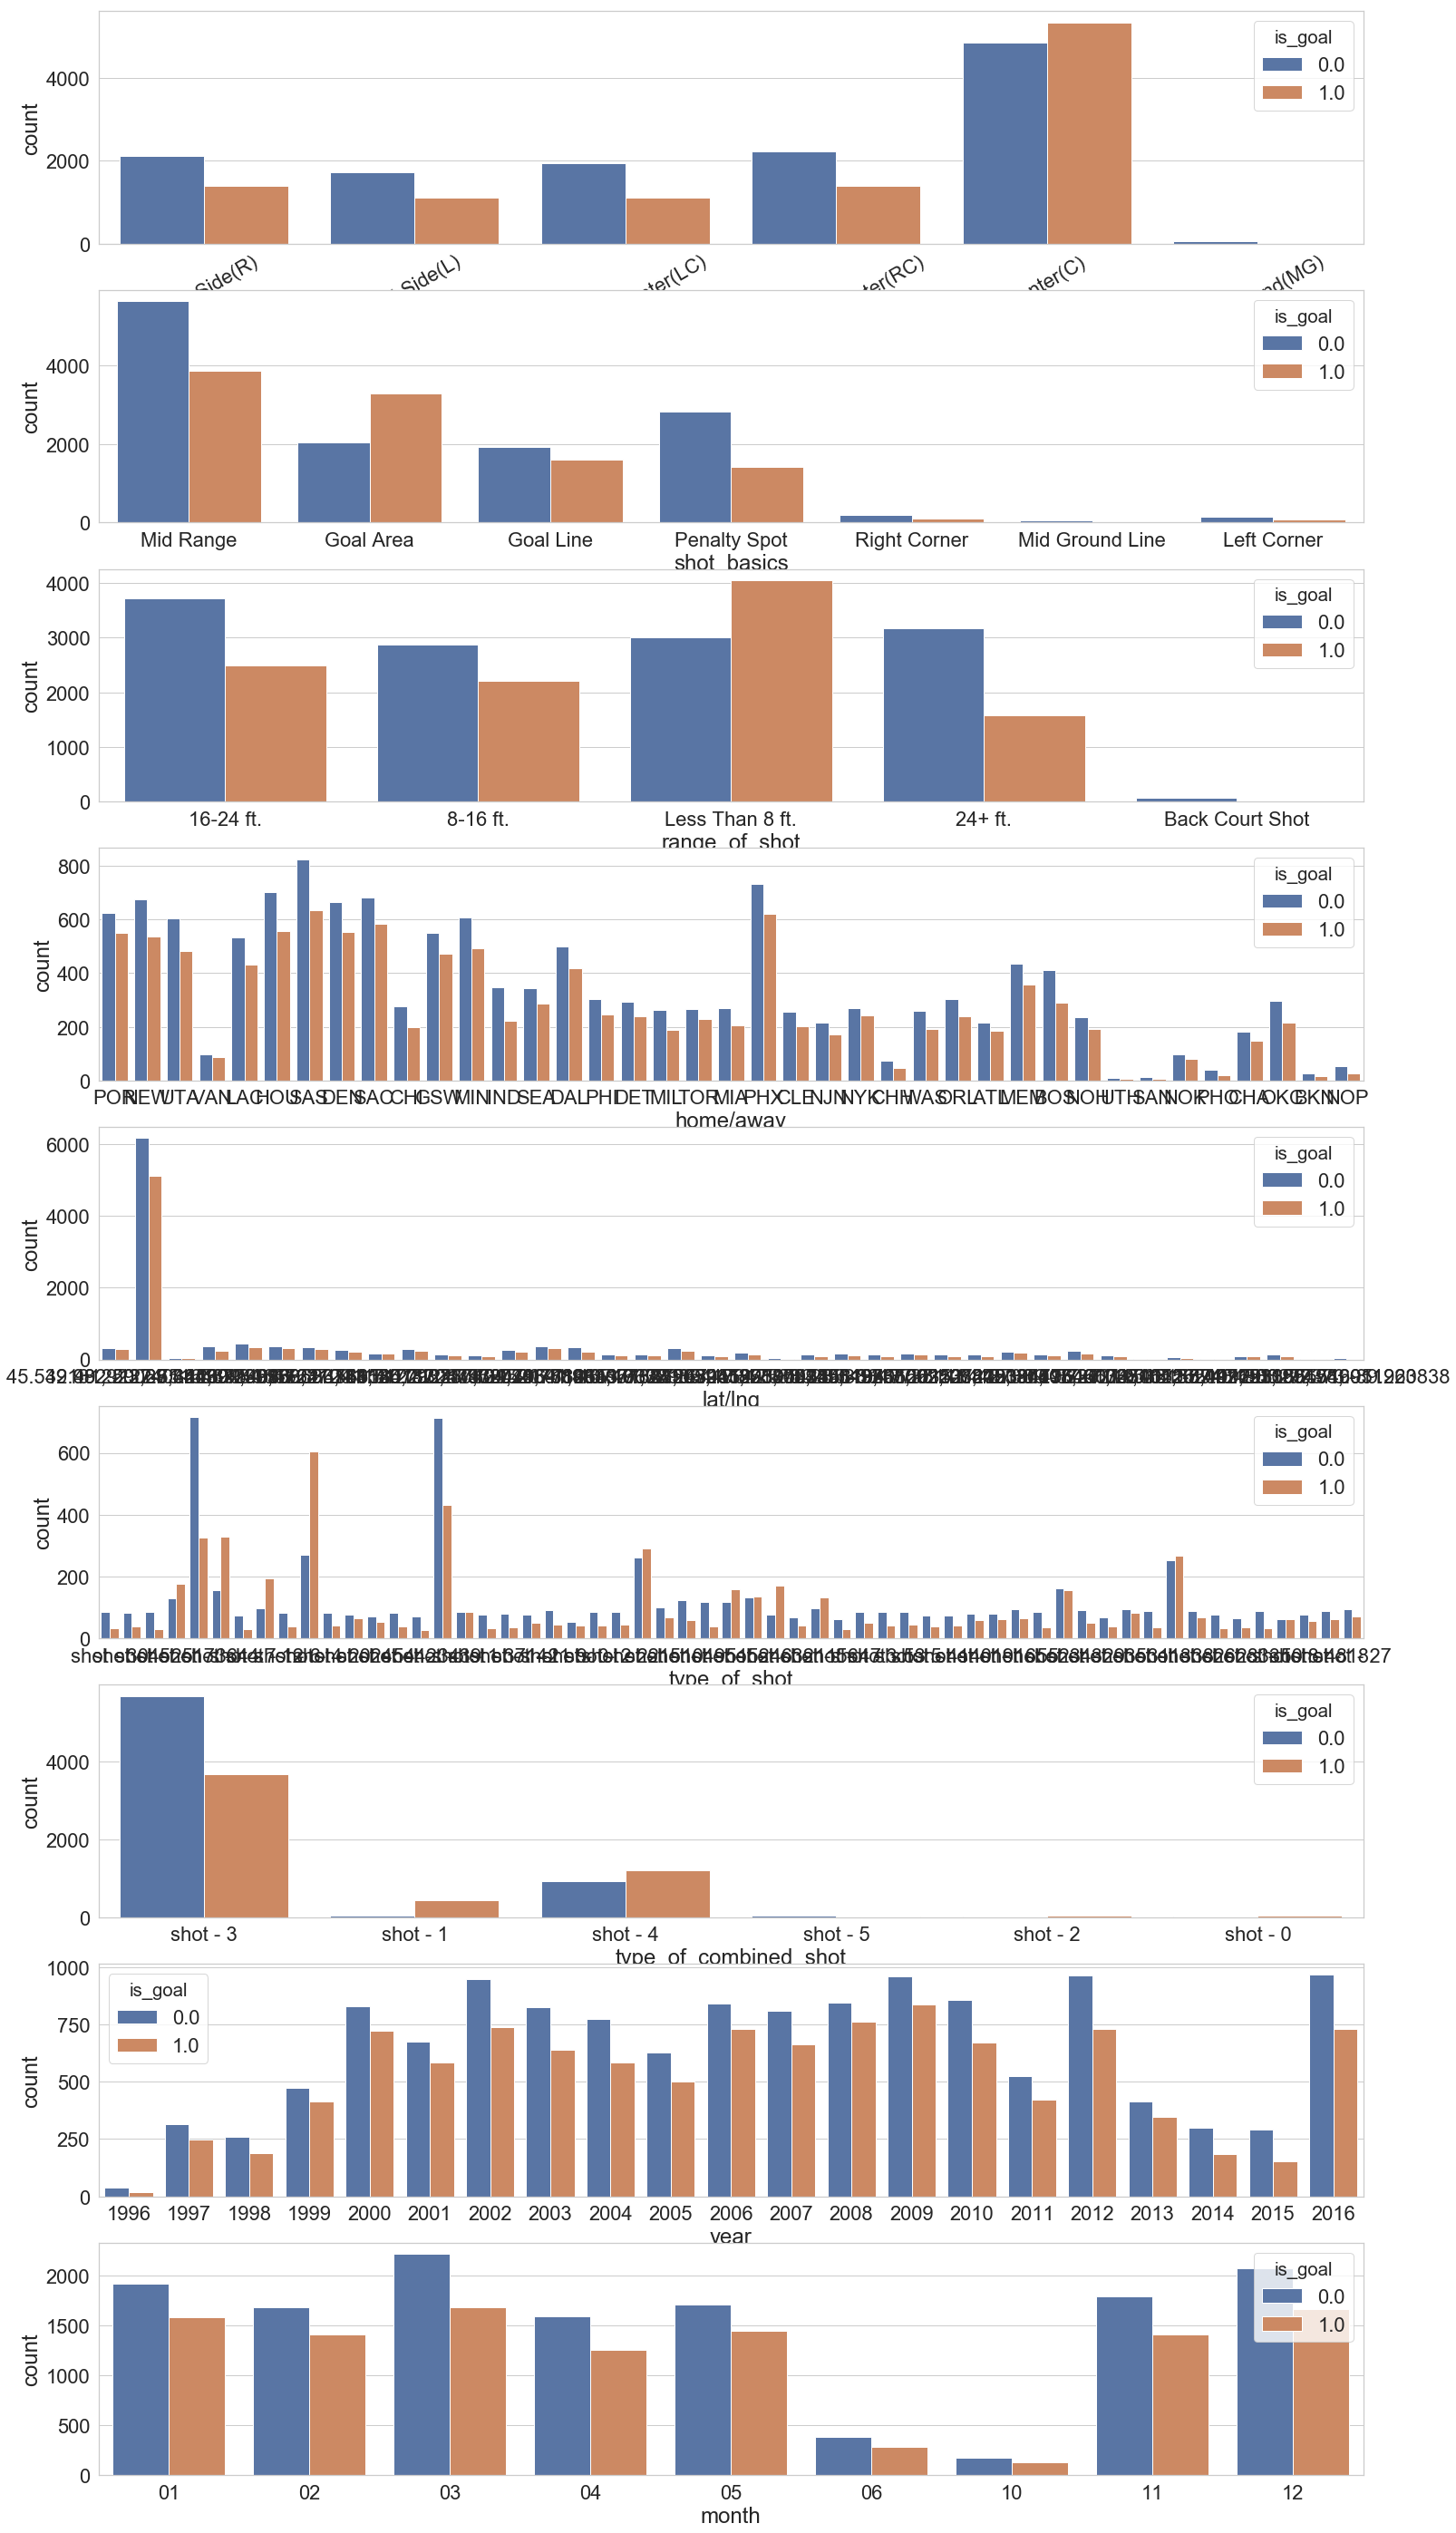

In [233]:
fig, ax = plt.subplots(9,1, figsize=(25, 50))
axes = ax.flatten()

for i, col in enumerate(object_col):
    sns.countplot(x=col, hue='is_goal', data=df, ax=axes[i])
    print(i, end=" ")
    
    for tick in axes[0].get_xticklabels():
        tick.set_rotation(30)

In [236]:
df.type_of_shot.value_counts()

shot - 39    1445
shot - 36    1292
shot - 4     1129
shot - 15     701
shot - 38     676
shot - 44     609
shot - 43     400
shot - 17     382
shot - 12     361
shot - 52     338
shot - 46     320
shot - 32     303
shot - 56     290
shot - 49     222
shot - 31     218
shot - 1      213
shot - 27     203
shot - 10     197
shot - 55     196
shot - 51     196
shot - 26     194
shot - 18     185
shot - 29     182
shot - 24     179
shot - 9      174
shot - 16     173
shot - 22     173
shot - 20     169
shot - 54     168
shot - 19     168
shot - 3      165
shot - 21     165
shot - 48     163
shot - 2      160
shot - 5      160
shot - 42     159
shot - 30     158
shot - 13     157
shot - 53     157
shot - 8      152
shot - 6      152
shot - 23     152
shot - 45     151
shot - 37     150
shot - 50     145
shot - 28     144
shot - 40     143
shot - 41     143
shot - 14     142
shot - 35     141
shot - 25     138
shot - 11     137
shot - 33     131
shot - 34     129
shot - 7      129
shot - 0  

In [241]:
df['lat/lng'].value_counts().sort_index()

25.790710, -80.207819       281
28.549237, -81.372780       394
29.444994, -98.524120       975
29.740325, -95.365762       741
30.018061, -90.022651       267
30.028164, -89.997933       122
30.055498, -89.960838        79
32.757824, -96.786653       589
33.513157, -112.082793       31
33.552026, -112.071667      817
33.768092, -84.393817       287
34.189593, -118.471724      605
35.103812, -89.964007       491
35.205878, -80.841194        65
35.262047, -80.865746       212
35.492151, -97.519011       296
37.754130, -122.437947      654
38.567296, -121.456638      843
38.919619, -77.015211       306
39.739968, -104.954013      826
39.993941, -75.143458       381
40.324211, -111.674849       19
40.361408, -86.186052       333
40.623199, -73.951223        39
40.643505, -73.939507       263
40.708999, -73.872430       316
40.774891, -111.930790      702
41.484971, -81.671552       309
41.845137, -87.660450       295
42.330507, -71.074655       499
42.379455, -83.115635       359
42.98292

In [242]:
df['lat/lng1'] = df['lat/lng'].copy()
df['lat/lng'] = df['lat/lng'].astype('str')
df['lat/lng'] = df['lat/lng'].apply(lambda x: x.replace('nan', '42.982923, -71.446094'))

# print(df.shape, "==>", end=" ")
# df['lat/lng'] = df['lat/lng'].apply(lambda x: x[-3:])
# print(df.shape)
df['lat/lng']

0        45.539131, -122.651648
1        45.539131, -122.651648
2        45.539131, -122.651648
3        45.539131, -122.651648
4        45.539131, -122.651648
5        45.539131, -122.651648
6        45.539131, -122.651648
7        45.539131, -122.651648
8        45.539131, -122.651648
9        45.539131, -122.651648
10       45.539131, -122.651648
11        42.982923, -71.446094
12        42.982923, -71.446094
13        42.982923, -71.446094
14        42.982923, -71.446094
15        42.982923, -71.446094
16        42.982923, -71.446094
17        42.982923, -71.446094
18        42.982923, -71.446094
19        42.982923, -71.446094
20        42.982923, -71.446094
21        42.982923, -71.446094
22        42.982923, -71.446094
23        42.982923, -71.446094
24        42.982923, -71.446094
25        42.982923, -71.446094
26        42.982923, -71.446094
27        42.982923, -71.446094
28        42.982923, -71.446094
29        42.982923, -71.446094
30        42.982923, -71.446094
31      

In [246]:
df['lat'] = df['lat/lng'].apply(lambda x: x.split(',')[0])
df['long'] = df['lat/lng'].apply(lambda x: x.split(',')[1])
df['lat'] = df['lat'].astype('float')
df['long'] = df['long'].astype('float')
df.shape

(30697, 27)

In [247]:
df.drop(['lat/lng1'], axis=1, inplace=True)
df.shape

(30697, 26)

In [ ]:
x = cos(lat) * cos(lon)
y = cos(lat) * sin(lon), 
z = sin(lat)

In [ ]:
Hierarchical clustering, PAM, CLARA, and DBSCAN are popular examples of this.

In [250]:
df['loc_x'] = np.cos(df['lat']) * np.cos(df['long'])
df['loc_y'] = np.cos(df['lat']) * np.sin(df['long'])
df['loc_z'] = np.sin(df['lat'])
df.shape

(30697, 29)

In [252]:
df.isnull().sum().sort_values()

loc_z                        0
match_id                     0
loc_y                        0
lat/lng                      0
loc_x                        0
long                         0
lat                          0
home/away                    0
month                        0
year                         0
location_x                1461
power_of_shot             1486
knockout_match.1          1493
area_of_shot              1502
knockout_match            1517
remaining_min.1           1535
remaining_sec.1           1539
power_of_shot.1           1539
location_y                1540
remaining_min             1562
match_event_id            1563
range_of_shot             1564
distance_of_shot          1567
distance_of_shot.1        1568
shot_basics               1575
remaining_sec             1594
is_goal                   6268
type_of_shot             15280
type_of_combined_shot    15417
dtype: int64

In [257]:
df['area_of_shot'].value_counts()

Center(C)                12761
Right Side Center(RC)     4562
Right Side(R)             4370
Left Side Center(LC)      3848
Left Side(L)              3573
Mid Ground(MG)              81
Name: area_of_shot, dtype: int64

In [261]:
df['range_of_shot'].value_counts()

Less Than 8 ft.    8933
16-24 ft.          7892
8-16 ft.           6290
24+ ft.            5937
Back Court Shot      81
Name: range_of_shot, dtype: int64

In [266]:
df['shot_basics'].value_counts()

Mid Range          11955
Goal Area           6787
Penalty Spot        5321
Goal Line           4357
Right Corner         367
Left Corner          268
Mid Ground Line       67
Name: shot_basics, dtype: int64

In [267]:
# df['area_of_shot'] = df['area_of_shot'].apply(lambda x: x.replace('nan', 'Center(C)'))
df['area_of_shot'].fillna('Center(C)', inplace=True)
df['range_of_shot'].fillna('Unknown', inplace=True)
df['shot_basics'].fillna('Unknown', inplace=True)

In [268]:
null_cols = ['location_x','power_of_shot','knockout_match.1','knockout_match','remaining_min.1','remaining_sec.1', 'distance_of_shot.1',
             'remaining_sec','power_of_shot.1','location_y','remaining_min','match_event_id','distance_of_shot']
df[null_cols].dtypes

location_x            float64
power_of_shot         float64
knockout_match.1      float64
knockout_match        float64
remaining_min.1       float64
remaining_sec.1       float64
distance_of_shot.1    float64
remaining_sec         float64
power_of_shot.1       float64
location_y            float64
remaining_min         float64
match_event_id        float64
distance_of_shot      float64
dtype: object

In [279]:
def get_quantile(df, col, q1, q2):
    """compute quantile range
    args:
        col: col name
        q1: lower quantile percentile
        q2: upper quantile percentile
    """
    df1 = df[[col]].dropna()
    lower_bound = np.percentile(df1, q=q1)
    upper_bound = np.percentile(df1, q=q2)
    lower_bound = np.round(lower_bound,3)
    upper_bound = np.round(upper_bound, 3)
    min_ = np.round(np.min(df1[col]), 3)
    max_ = np.round(np.max(df1[col]), 3)
    mean_ = np.round(np.mean(df1[[col]].values), 3)
    median_ = np.round(np.median(df1[[col]].values), 3)
#     mean_ = df1[col].mean()
    print("{4:<25} min: {0:<10} max: {1:<10} mean: {5:<10} median: {6:<10} low: {2:<10} high: {3:<10}".format(
        min_, max_, lower_bound, upper_bound, col, mean_, median_))


for col in null_cols:
    try:
        get_quantile(df[df.is_goal == 0], col, 1, 99)
    except:
        print("couldn't do it")
        
print("=="*50)        

for col in null_cols:
    try:
        get_quantile(df[df.is_goal == 1], col, 1, 99)
    except:
        print("couldn't do it")

location_x                min: -248.0     max: 248.0      mean: 7.961      median: 0.0        low: -226.03    high: 230.0     
power_of_shot             min: 1.0        max: 7.0        mean: 2.557      median: 3.0        low: 1.0        high: 5.0       
knockout_match.1          min: 0.0        max: 141.352    mean: 16.559     median: 0.0        low: 0.0        high: 129.928   
knockout_match            min: 0.0        max: 1.0        mean: 0.145      median: 0.0        low: 0.0        high: 1.0       
remaining_min.1           min: 0.0        max: 128.762    mean: 17.93      median: 6.0        low: 0.0        high: 114.64    
remaining_sec.1           min: 0.0        max: 144.786    mean: 38.525     median: 34.0       low: 0.0        high: 133.786   
distance_of_shot.1        min: 9.4        max: 115.728    mean: 40.01      median: 37.4       low: 15.4       high: 105.4     
remaining_sec             min: 0.0        max: 59.0       mean: 27.835     median: 28.0       low: 0.0        h

In [288]:
df[col].fillna(df[col].median()).isnull().sum()

0

In [289]:
df1 = df.copy()
for col in null_cols:
    df[col] = df[col].fillna(df[col].median())

In [290]:
df.isnull().sum()

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
remaining_sec                0
distance_of_shot             0
is_goal                   6268
area_of_shot                 0
shot_basics                  0
range_of_shot                0
home/away                    0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
remaining_min.1              0
power_of_shot.1              0
knockout_match.1             0
remaining_sec.1              0
distance_of_shot.1           0
year                         0
month                        0
lat                          0
long                         0
loc_x                        0
loc_y                        0
loc_z                        0
dtype: int64

In [293]:
df['type_of_combined_shot'].value_counts().sort_index()

shot - 0       78
shot - 1      609
shot - 2       82
shot - 3    11685
shot - 4     2736
shot - 5       90
Name: type_of_combined_shot, dtype: int64

In [295]:
df['type_of_combined_shot'].fillna('shot - 6', inplace=True)

In [296]:
df['type_of_shot'].value_counts().sort_index()

shot - 0      119
shot - 1      213
shot - 10     197
shot - 11     137
shot - 12     361
shot - 13     157
shot - 14     142
shot - 15     701
shot - 16     173
shot - 17     382
shot - 18     185
shot - 19     168
shot - 2      160
shot - 20     169
shot - 21     165
shot - 22     173
shot - 23     152
shot - 24     179
shot - 25     138
shot - 26     194
shot - 27     203
shot - 28     144
shot - 29     182
shot - 3      165
shot - 30     158
shot - 31     218
shot - 32     303
shot - 33     131
shot - 34     129
shot - 35     141
shot - 36    1292
shot - 37     150
shot - 38     676
shot - 39    1445
shot - 4     1129
shot - 40     143
shot - 41     143
shot - 42     159
shot - 43     400
shot - 44     609
shot - 45     151
shot - 46     320
shot - 47     119
shot - 48     163
shot - 49     222
shot - 5      160
shot - 50     145
shot - 51     196
shot - 52     338
shot - 53     157
shot - 54     168
shot - 55     196
shot - 56     290
shot - 6      152
shot - 7      129
shot - 8  

In [298]:
df['shot_null'] = df['type_of_shot'].isnull()
df['type_of_shot'].fillna('shot - 60', inplace=True)

In [299]:
df.isnull().sum()

match_event_id              0
location_x                  0
location_y                  0
remaining_min               0
power_of_shot               0
knockout_match              0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
home/away                   0
lat/lng                     0
type_of_shot                0
type_of_combined_shot       0
match_id                    0
remaining_min.1             0
power_of_shot.1             0
knockout_match.1            0
remaining_sec.1             0
distance_of_shot.1          0
year                        0
month                       0
lat                         0
long                        0
loc_x                       0
loc_y                       0
loc_z                       0
shot_null                   0
dtype: int64

In [300]:
df[['location_x', 'location_y', 'loc_x', 'loc_y']]

,location_x,location_y,loc_x,loc_y
0,167.0,72.0,-0.013845,0.001804
1,-157.0,0.0,-0.013845,0.001804
2,-101.0,135.0,-0.013845,0.001804
3,138.0,175.0,-0.013845,0.001804
4,0.0,0.0,-0.013845,0.001804
5,-145.0,-11.0,-0.013845,0.001804
6,0.0,0.0,-0.013845,0.001804
7,1.0,28.0,-0.013845,0.001804
8,-65.0,74.0,-0.013845,0.001804
9,-33.0,74.0,-0.013845,0.001804


In [303]:
df['loc_x'] = df['loc_x']*6371
df['loc_y'] = df['loc_y']*6371
df['loc_z'] = df['loc_z']*6371

In [323]:

import pandas as pd
import numpy as np
import os, gc
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score, mean_squared_error
from catboost import Pool, CatBoostClassifier, CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb


def train_lgb_model(X_train, y_train, X_valid, y_valid, features, param, X_test, num_round):
    """
    Args:
        X_train, X_valid: training and valid data
        y_train, y_valid: training and valid target
        X_test: test-data
        features: training features
    Return:
        oof-pred, test_preds model, model_imp
    """
    _train = lgb.Dataset(X_train[features], label=y_train, feature_name=list(features))
    _valid = lgb.Dataset(X_valid[features], label=y_valid,feature_name=list(features))
    
    clf = lgb.train(param, _train, num_round, 
                    valid_sets = [_train, _valid], 
                    verbose_eval=200, 
                    early_stopping_rounds = 25)                  
    
    oof = clf.predict(X_valid[features], num_iteration=clf.best_iteration)
    test_pred = clf.predict(X_test[features], num_iteration=clf.best_iteration)
    
    lgb_imp = pd.DataFrame(data=[clf.feature_name(), list(clf.feature_importance())]).T
    lgb_imp.columns = ['feature','imp']
    
    return oof, test_pred, clf, lgb_imp
    



def run_cv_lgb(train_df, target, test_df, leaves=None):

    param = {
        'bagging_freq'           : 5,
        'bagging_fraction'       : 0.33,
        'boost_from_average'     : 'false',
        'boost'                  : 'gbdt',
        'feature_fraction'       : 0.3,
        'learning_rate'          : 0.01,
        'max_depth'              : -1,
        'metric'                 : 'mse',
        'min_data_in_leaf'       : 100,
#         'min_sum_hessian_in_leaf': 10.0,
        'num_leaves'             : 30,
        'num_threads'            : 4,
        'tree_learner'           : 'serial',
        'objective'              : 'mean_squared_error',
        'verbosity'              : 1,
    #     'lambda_l1'              : 0.001,
        'lambda_l2'              : 0.1
    }   
    if leaves is not None:
        param['num_leaves'] = leaves
        print("using leaves: ", param['num_leaves'])

    random_seed = 1234
    n_splits = 3
    num_round = 10000
    feature_imp = pd.DataFrame()
    
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_lgb = np.zeros(len(train_df))
    predictions = np.zeros((len(test_df),n_splits))

    clfs = []
    
    for fold_, (train_index, valid_index) in enumerate(folds.split(train_df, target)):
        print(train_index.shape, valid_index.shape)
        print("Fold {}".format(fold_))
    
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        features = X_train.columns
        
#         X_train.drop(['disbursal_week','disbursal_day'], axis=1, inplace=True)
#         X_valid.drop(['disbursal_week','disbursal_day'], axis=1, inplace=True)

        num_round = 10000
        oof, test_pred, clf, lgb_imp = train_lgb_model(X_train, y_train, 
                                                       X_valid, y_valid, 
                                                       features, param, 
                                                       test_df, num_round)
        lgb_imp['fold'] = fold_
        feature_imp = pd.concat([feature_imp, lgb_imp], axis=0)
    
        oof_lgb[valid_index] = oof
        predictions[:,fold_] = test_pred
        clfs.append(clf)
        
        score = mean_squared_error(y_valid, oof)
        print( "  score = ", 1/(1 + score) )
        print("="*60)
    
    feature_imp.imp = feature_imp.imp.astype('float')
    feature_imp = feature_imp.groupby(['feature'])['imp'].mean()
    feature_imp = pd.DataFrame(data=[feature_imp.index, feature_imp.values]).T
    feature_imp.columns=['feature','imp']
    feature_imp = feature_imp.sort_values(by='imp')

    return clfs, feature_imp, oof_lgb, predictions




In [320]:
for col in object_col:
    df[col] = df[col].astype('category').cat.codes

In [321]:
try:
    del df1
    gc.collect()
except:
    print("df not exist")
    
df1 = df.copy()
df1.isnull().sum()

train_df = df[~df.is_goal.isnull()]
test_df  = df[df.is_goal.isnull()]

target = train_df['is_goal']
train_df.drop(['is_goal'], axis=1, inplace=True)
test_df.drop(['is_goal'], axis=1, inplace=True)

train_df.shape, test_df.shape

((24429, 29), (6268, 29))

In [324]:
clfs_lgb, imp_lgb, oof_lgb, pred_lgb = run_cv_lgb(train_df, target, 
                                                  test_df, leaves=50)


using leaves:  50
(16286,) (8143,)
Fold 0
Training until validation scores don't improve for 25 rounds.
[200]	training's l2: 0.226625	valid_1's l2: 0.23732
[400]	training's l2: 0.213671	valid_1's l2: 0.229827
Early stopping, best iteration is:
[488]	training's l2: 0.210482	valid_1's l2: 0.229398
  score =  0.8134065435422138
(16286,) (8143,)
Fold 1
Training until validation scores don't improve for 25 rounds.
[200]	training's l2: 0.227592	valid_1's l2: 0.234106
[400]	training's l2: 0.214297	valid_1's l2: 0.227901
Early stopping, best iteration is:
[470]	training's l2: 0.211767	valid_1's l2: 0.22764
  score =  0.8145710434631337
(16286,) (8143,)
Fold 2
Training until validation scores don't improve for 25 rounds.
[200]	training's l2: 0.227245	valid_1's l2: 0.233377
[400]	training's l2: 0.214275	valid_1's l2: 0.228543
Early stopping, best iteration is:
[451]	training's l2: 0.212398	valid_1's l2: 0.228296
  score =  0.8141363042981153


In [327]:
from catboost import Pool, CatBoostClassifier, CatBoostRegressor

def train_cat_model(X_train, y_train, X_valid, y_valid, features, param, X_test, 
                    num_round):
    """
    Args:
        X_train, X_valid: training and valid data
        y_train, y_valid: training and valid target
        X_test: test-data
        features: training features
    Return:
        oof-pred, test_preds, model, model_imp
    """
    param['iterations'] = num_round
    
    _train = Pool(X_train[features], label=y_train)#, cat_features=cate_features_index)
    _valid = Pool(X_valid[features], label=y_valid)#, cat_features=cate_features_index)

    watchlist = [_train, _valid]
    clf = CatBoostRegressor(**param)
    clf.fit(_train, 
            eval_set=watchlist, 
            verbose=200,
            use_best_model=True)
        
    oof  = clf.predict(X_valid[features])
    test_pred  = clf.predict(X_test[features])

    cat_imp = pd.DataFrame(data=[clf.feature_names_, 
                                 list(clf.feature_importances_)]).T
    cat_imp.columns = ['feature','imp']
    
    return oof, test_pred, clf, cat_imp


def run_cv_cat(train_df, target, test_df, depth):

    params = {
        'loss_function'         : "MAE", 
#         'eval_metric'           : "AUC",
        'random_strength'       : 1.5,
        'border_count'          : 128,
#         'scale_pos_weight'      : 3.507,
        'depth'                 : depth, 
        'early_stopping_rounds' : 50,
        'random_seed'           : 1337,
        'task_type'             : 'CPU', 
#         'subsample'             = 0.7, 
        'iterations'            : 10000, 
        'learning_rate'         : 0.09,
        'thread_count'          : 4
    }


    ##########################
    n_splits = 3
    random_seed = 1234
    feature_imp = pd.DataFrame()
    
    folds = KFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_cat = np.zeros(len(train_df))
    predictions = np.zeros((len(test_df),n_splits))
    clfs = []
##########################
    for fold_, (train_index, valid_index) in enumerate(folds.split(train_df, target)):
        print(train_index.shape, valid_index.shape)
        print("Fold {}".format(fold_))
    
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        features = X_train.columns
        
        num_rounds = 10000
        oof, test_pred, clf, cat_imp = train_cat_model(X_train, y_train, 
                                                       X_valid, y_valid, 
                                                       features, params, 
                                                       test_df, num_rounds)
    
        oof_cat[valid_index] = oof
        predictions[:,fold_] = test_pred
        
        cat_imp['fold'] = fold_
        feature_imp = pd.concat([feature_imp, cat_imp], axis=0)
        clfs.append(clf)
        
        score = mean_squared_error(y_valid, oof)
        print( "  score = ", 1/(1 + score) )
        print("="*60)
    
    feature_imp.imp = feature_imp.imp.astype('float')
    feature_imp = feature_imp.groupby(['feature'])['imp'].mean()
    feature_imp = pd.DataFrame(data=[feature_imp.index, feature_imp.values]).T
    feature_imp.columns=['feature','imp']
    feature_imp = feature_imp.sort_values(by='imp')

    return clfs, feature_imp, oof_cat, predictions



In [328]:
clfs_cat, imp_cat, oof_cat, pred_cat = run_cv_cat(train_df, target, test_df, 4)


(16286,) (8143,)
Fold 0
0:	learn: 0.4479282	test: 0.4479282	test1: 0.4603642	best: 0.4603642 (0)	total: 67.3ms	remaining: 11m 12s
200:	learn: 0.3818693	test: 0.3818693	test1: 0.3952068	best: 0.3951363 (190)	total: 1.17s	remaining: 56.8s
400:	learn: 0.3764218	test: 0.3764218	test1: 0.3932656	best: 0.3932089 (386)	total: 2.07s	remaining: 49.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3931132764
bestIteration = 470

Shrink model to first 471 iterations.
  score =  0.7420757195472939
(16286,) (8143,)
Fold 1
0:	learn: 0.4518312	test: 0.4518312	test1: 0.4512063	best: 0.4512063 (0)	total: 7.93ms	remaining: 1m 19s
200:	learn: 0.3857575	test: 0.3857575	test1: 0.3860624	best: 0.3860624 (200)	total: 1.12s	remaining: 54.7s
400:	learn: 0.3787323	test: 0.3787323	test1: 0.3842292	best: 0.3841083 (386)	total: 2.15s	remaining: 51.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3833794975
bestIteration = 538

Shrink model to first 539 iterations.
  score

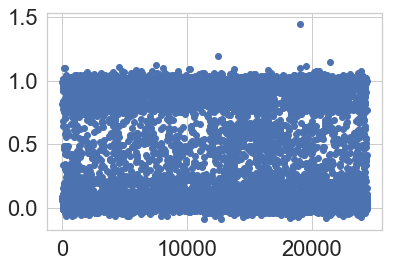

In [331]:
plt.scatter(range(len(oof_cat)), oof_cat)

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

In [337]:

def train_xgb_model(X_train, y_train, X_valid, y_valid, features, param, X_test, 
                    num_round):
    """
    Args:
        X_train, X_valid: training and valid data
        y_train, y_valid: training and valid target
        X_test: test-data
        features: training features
    Return:
        oof-pred, test_preds, model, model_imp
    """
    _train = xgb.DMatrix(X_train[features], label=y_train, feature_names=list(features))
    _valid = xgb.DMatrix(X_valid[features], label=y_valid,feature_names=list(features))
    
    watchlist = [(_valid, 'valid')]
    clf = xgb.train(dtrain=_train, 
                    num_boost_round=num_round, 
                    evals=watchlist,
                    early_stopping_rounds=25, 
                    verbose_eval=200, 
                    params=param)
    
    valid_frame = xgb.DMatrix(X_valid[features],feature_names=list(features))
    oof  = clf.predict(valid_frame, ntree_limit=clf.best_ntree_limit)


    test_frame = xgb.DMatrix(X_test[features],feature_names=list(features))
    test_pred = clf.predict(test_frame, ntree_limit=clf.best_ntree_limit)

    
    xgb_imp = pd.DataFrame(data=[list(clf.get_fscore().keys()), 
                                 list(clf.get_fscore().values())]).T
    xgb_imp.columns = ['feature','imp']
    xgb_imp.imp = xgb_imp.imp.astype('float')
    
    return oof, test_pred, clf, xgb_imp


def run_cv_xgb(train_df, target, test_df, depth):

    features = train_df.columns
    params = {
        'eval_metric'     : 'auc',
        'seed'            : 1337,
        'eta'             : 0.01,
        'subsample'       : 0.7,
        'colsample_bytree': 0.5,
        'silent'          : 1,
        'nthread'         : 4,
        'Scale_pos_weight': 3.607,
        'objective'       : 'binary:logistic',
        'max_depth'       : depth,
        'alpha'           : 0.05
    }
    
    n_splits = 3
    random_seed = 1234
    feature_imp = pd.DataFrame()
    
    folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)
    oof_xgb = np.zeros(len(train_df))
    predictions = np.zeros((len(test_df),n_splits))
    clfs = []
##########################
    for fold_, (train_index, valid_index) in enumerate(folds.split(train_df, target)):
        print(train_index.shape, valid_index.shape)
        print("Fold {}".format(fold_))
    
        y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
        X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
        features = X_train.columns
        

        num_rounds = 10000
        oof, test_pred, clf, xgb_imp = train_xgb_model(X_train, y_train, 
                                                       X_valid, y_valid, 
                                                       features, params, 
                                                       test_df, num_rounds)
        
        xgb_imp['fold'] = fold_
        feature_imp = pd.concat([feature_imp, xgb_imp], axis=0)
    
        oof_xgb[valid_index] = oof
        predictions[:,fold_] = test_pred
        clfs.append(clf)
        
        score = roc_auc_score(y_valid, oof)
        print( "  auc = ", score )
        print("="*60)
    
    feature_imp.imp = feature_imp.imp.astype('float')
    feature_imp = feature_imp.groupby(['feature'])['imp'].mean()
    feature_imp = pd.DataFrame(data=[feature_imp.index, feature_imp.values]).T
    feature_imp.columns=['feature','imp']
    feature_imp = feature_imp.sort_values(by='imp')


    return clfs, feature_imp, oof_xgb, predictions


In [338]:
clfs_xgb, imp_xgb, oof_xgb, pred_xgb = run_cv_xgb(train_df, target, test_df, 10)


(16285,) (8144,)
Fold 0
[0]	valid-auc:0.603787
Will train until valid-auc hasn't improved in 25 rounds.
Stopping. Best iteration:
[21]	valid-auc:0.628056

  auc =  0.6280564084130539
(16286,) (8143,)
Fold 1
[0]	valid-auc:0.586252
Will train until valid-auc hasn't improved in 25 rounds.
Stopping. Best iteration:
[18]	valid-auc:0.643972

  auc =  0.643971826235655
(16287,) (8142,)
Fold 2
[0]	valid-auc:0.568805
Will train until valid-auc hasn't improved in 25 rounds.
Stopping. Best iteration:
[170]	valid-auc:0.643401

  auc =  0.6434009285853521


In [345]:
pred_xgb.mean(axis=1)

array([0.45247984, 0.49586807, 0.51881551, ..., 0.53684777, 0.4769396 ,
       0.51013551])

In [346]:
sub = pd.read_csv('data/sample_submission.csv')
sub.head()

,shot_id_number,is_goal
0,1,0.1
1,8,0.1
2,17,0.1
3,20,0.1
4,33,0.1


In [348]:
sub.shape, pred_xgb.shape

((5000, 2), (6268, 3))